In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)
import numpy as np
import datetime
import matplotlib.pyplot as plt

cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))
df = pd.read_csv('./data/metro_CA_2011_2018_lagged.csv', index_col = None)
# change year format to datetime
df["year"]= pd.to_datetime(df["year"], format = "%Y").dt.year
df.sort_values("year", ignore_index = True, inplace = True)
df.head()

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,

In [205]:
targets = ["rent_in_1y","rent_in_2y","rent_in_3y","rent_in_4y","rent_in_5y"]
targets = df[targets]
targets.head()

,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667
1,3528.083333,3566.454545,3752.583333,4034.250000,4142.750000
2,1880.500000,1935.250000,1958.833333,2116.083333,2193.666667
3,2163.750000,2264.416667,2349.916667,2538.750000,2621.416667
4,1872.166667,1900.583333,1962.583333,2096.250000,2234.666667


In [158]:
dem = [ 'not_us_citizen_pop',
        'median_age',
        'amerindian_including_hispanic',
        'amerindian_pop', 
        'asian_including_hispanic',
        'asian_male_45_54',
        'asian_male_55_64',
        'asian_pop',
        'black_including_hispanic',
         'black_male_45_54',
         'black_male_55_64',
         'black_pop',
         'white_including_hispanic',
 'white_male_45_54',
 'white_male_55_64',
 'white_pop',
   'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_5_to_9',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
       'female_pop',
 'female_under_5',
       'hispanic_any_race',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'hispanic_pop',
       'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_64_associates_degree',
 'male_45_64_bachelors_degree',
 'male_45_64_grade_9_12',
 'male_45_64_graduate_degree',
 'male_45_64_high_school',
 'male_45_64_less_than_9_grade',
 'male_45_64_some_college',
 'male_45_to_49',
 'male_45_to_64',
 'male_50_to_54',
 'male_55_to_59',
 'male_5_to_9',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'male_pop',
 'male_under_5',
  'not_hispanic_pop',
  'other_race_pop',
       'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
       'population_1_year_and_over',
 'population_3_years_over',
       'speak_only_english_at_home',
 'speak_spanish_at_home',
 'speak_spanish_at_home_low_english',
   'two_or_more_races_pop',
     'total_pop'       
      ]
commute = ['no_car',
 'no_cars',
     'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
    'four_more_cars',
            'one_car',
           'three_cars',
 'two_cars',
 'walked_to_work',
           'aggregate_travel_time_to_work',
]
occ = ['not_in_labor_force',
       'pop_in_labor_force',
       'unemployed_pop',
    'armed_forces',
       'civilian_labor_force',
       'employed_agriculture_forestry_fishing_hunting_mining',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_construction',
 'employed_education_health_social',
 'employed_finance_insurance_real_estate',
 'employed_information',
 'employed_manufacturing',
 'employed_other_services_not_public_admin',
 'employed_pop',
 'employed_public_administration',
 'employed_retail_trade',
 'employed_science_management_admin_waste',
 'employed_transportation_warehousing_utilities',
       'employed_wholesale_trade',
       'employed_transportation_warehousing_utilities',
       'graduate_professional_degree',
       'management_business_sci_arts_employed',
 'occupation_management_arts',
 'occupation_natural_resources_construction_maintenance',
 'occupation_production_transportation_material',
 'occupation_sales_office',
 'occupation_services',
  'sales_office_employed',
       'worked_at_home',
 'workers_16_and_over', 
      ]
ed = ['associates_degree',
      'bachelors_degree',
      'bachelors_degree_2',
      'bachelors_degree_or_higher_25_64',
      'group_quarters',
      'high_school_diploma',
      'high_school_including_ged',
      'masters_degree',
      'one_year_more_college',
      'some_college_and_associates_degree',
       'male_45_64_associates_degree',
         'male_45_64_bachelors_degree',
         'male_45_64_grade_9_12',
         'male_45_64_graduate_degree',
         'male_45_64_high_school',
        'male_45_64_less_than_9_grade',
         'male_45_64_some_college',
      'in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
 'in_school',
 'in_undergrad_college',
       'less_one_year_college',
 'less_than_high_school_graduate',
      ]
income = ['year',
          'median_income',
          'percent_income_spent_on_rent',
          'pop_determined_poverty_status',
          'poverty',
          'rent_10_to_15_percent',
 'rent_15_to_20_percent',
 'rent_20_to_25_percent',
 'rent_25_to_30_percent',
 'rent_30_to_35_percent',
 'rent_35_to_40_percent',
 'rent_40_to_50_percent',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_under_10_percent',
'renter_occupied_housing_units_paying_cash_median_gross_rent',
          'income_100000_124999',
 'income_10000_14999',
 'income_125000_149999',
 'income_150000_199999',
 'income_15000_19999',
 'income_200000_or_more',
 'income_20000_24999',
 'income_25000_29999',
 'income_30000_34999',
 'income_35000_39999',
 'income_40000_44999',
 'income_45000_49999',
 'income_50000_59999',
 'income_60000_74999',
 'income_75000_99999',
 'income_less_10000',
 'income_per_capita',
]
ar = ['avg_rent',
       'median_rent',
    'vacant_housing_units',
     'vacant_housing_units_for_rent',
     'vacant_housing_units_for_sale'
]
hh = [ 'married_households',
      'pop_divorced',
      'children',
      'children_in_single_female_hh',
      'families_with_young_children',
      'family_households',
      'father_in_labor_force_one_parent_families_with_young_children',
      'father_one_parent_families_with_young_children',
      'female_female_households',
       'male_male_households',
      'nonfamily_households',
  'one_parent_families_with_young_children',
 'pop_never_married',
 'pop_now_married',
 'pop_separated',
 'pop_widowed',
  'two_parent_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_not_in_labor_force_families_with_young_children',
      'households',
 'households_public_asst_or_food_stamps',
 'households_retirement_income',
 'housing_built_1939_or_earlier',
 'housing_built_2000_to_2004',
 'housing_built_2005_or_later',
 'housing_units',
 'housing_units_renter_occupied',
      
     ]
mig = ['different_house_year_ago_different_city',
 'different_house_year_ago_same_city',
      'gini_index'
      ]
dwell = [
    'dwellings_10_to_19_units',
 'dwellings_1_units_attached',
 'dwellings_1_units_detached',
 'dwellings_20_to_49_units',
 'dwellings_2_units',
 'dwellings_3_to_4_units',
 'dwellings_50_or_more_units',
 'dwellings_5_to_9_units',
     'median_year_structure_built',
 'million_dollar_housing_units',
 'mobile_homes',
 'mortgaged_housing_units',
    'occupied_housing_units',
    'owner_occupied_housing_units_lower_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_upper_value_quartile',
    'owner_occupied_housing_units'
]

In [66]:
#set(df.columns)-set(dem+commute+occ+ed+income+ar+hh+mig+dwell)

In [159]:
dem = df[dem]
commute = df[commute]
occ = df[occ]
ed = df[ed]
income = df[income]
hh = df[hh]
mig = df[mig]
dwell = df[dwell]
ar = df[ar]
target = df['rent_in_1y']

In [160]:
#female_age groups 
dem['Female_10_24'] = dem[['female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24']].sum(axis = 1)
dem['Female_25_59'] = dem[['female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59']].sum(axis = 1)
dem['Female_60_above'] = dem[['female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over']].sum(axis = 1)
dem['Female_9_youner'] = dem[[ 'female_5_to_9','female_under_5']].sum(axis = 1)


<ipython-input-160-2c950576f955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['Female_10_24'] = dem[['female_10_to_14',
<ipython-input-160-2c950576f955>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['Female_25_59'] = dem[['female_25_to_29',
<ipython-input-160-2c950576f955>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [161]:
#male_age groups
dem['male_25_to_59'] = dem[['male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59']].sum(axis = 1)
dem['male_10_24'] = dem[['male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24']].sum(axis = 1)
dem['male_60_above'] = dem[['male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over']].sum(axis = 1)
dem['male_9_youner'] = dem[[ 'male_5_to_9','male_under_5']].sum(axis = 1)
dem = dem.drop(['male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59','male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24','male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over','male_5_to_9','male_under_5',
          'speak_spanish_at_home_low_english',
          'hispanic_pop',
          'not_hispanic_pop',
        'two_or_more_races_pop',
         'hispanic_male_45_54',
       'hispanic_male_55_64',
        'asian_male_55_64',
        'black_male_45_54',
        'black_male_55_64',
        'white_male_45_54',
         'white_male_55_64',
          'male_45_64_associates_degree',
         'male_45_64_bachelors_degree',
         'male_45_64_grade_9_12',
         'male_45_64_graduate_degree',
         'male_45_64_high_school',
        'male_45_64_less_than_9_grade',
         'male_45_64_some_college',], axis = 1)


<ipython-input-161-d7964f356d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['male_25_to_59'] = dem[['male_25_to_29',
<ipython-input-161-d7964f356d7a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['male_10_24'] = dem[['male_10_to_14',
<ipython-input-161-d7964f356d7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [164]:
len(list(dem.columns))

57

In [162]:
commute["commute_10_45_min"] = commute[['commute_15_19_mins',
                                           'commute_20_24_mins',
                                            'commute_25_29_mins',
                                            'commute_30_34_mins',
                                             'commute_35_39_mins',
                                             'commute_35_44_mins']].sum(axis = 1)
commute["commute_45_90_min"] = commute[['commute_45_59_mins',
                                         'commute_5_9_mins',
                                         'commute_60_89_mins',]].sum(axis = 1)
commute = commute.drop(['commute_10_14_mins','commute_15_19_mins','commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
  'commute_45_59_mins',
 'commute_5_9_mins',
'commute_60_more_mins',
 'commute_60_89_mins','aggregate_travel_time_to_work'],axis = 1)


<ipython-input-162-a60e9e524423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute["commute_10_45_min"] = commute[['commute_15_19_mins',
<ipython-input-162-a60e9e524423>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute["commute_45_90_min"] = commute[['commute_45_59_mins',


In [163]:
len(list(commute.columns))

18

In [118]:
# list(ed.columns)

In [165]:
ed = ed.drop(['high_school_diploma','one_year_more_college','in_grades_1_to_4',
 'in_grades_5_to_8',
 'in_grades_9_to_12',
'less_one_year_college', 'some_college_and_associates_degree'], axis = 1)

In [166]:
ed.shape

(6091, 17)

In [201]:
df1 = pd.concat([targets,dem,commute, occ, ed, income, hh, mig, ar], axis=1) 
df1.head(10)

,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y,not_us_citizen_pop,median_age,amerindian_including_hispanic,amerindian_pop,asian_including_hispanic,asian_male_45_54,asian_pop,black_including_hispanic,black_pop,white_including_hispanic,white_pop,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_pop,female_under_5,hispanic_any_race,male_45_to_64,male_pop,other_race_pop,pop_15_and_over,pop_16_over,pop_25_64,pop_25_years_over,pop_5_years_over,population_1_year_and_over,population_3_years_over,speak_only_english_at_home,speak_spanish_at_home,total_pop,Female_10_24,Female_25_59,Female_60_above,Female_9_youner,male_25_to_59,male_10_24,male_60_above,male_9_youner,no_car,no_cars,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,four_more_cars,one_car,three_cars,two_cars,walked_to_work,commute_10_45_min,commute_45_90_min,not_in_labor_force,pop_in_labor_force,unemployed_pop,armed_forces,civilian_labor_force,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,employed_transportation_warehousing_utilities,graduate_professional_degree,management_business_sci_arts_employed,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,sales_office_employed,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,group_quarters,high_school_including_ged,masters_degree,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,in_school,in_undergrad_college,less_than_high_school_graduate,year,median_income,percent_income_spent_on_rent,pop_determined_poverty_status,poverty,rent_10_to_15_percent,rent_15_to_20_percent,rent_20_to_25_percent,rent_25_to_30_percent,rent_30_to_35_percent,rent_35_to_40_percent,rent_40_to_50_percent,rent_burden_not_computed,rent_over_50_percent,rent_under_10_percent,renter_occupied_housing_units_paying_cash_median_gross_rent,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,married_households,pop_divorced,children,children_in_single_female_hh,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_female_households,male_male_households,nonfamily_households,one_parent_families_with_young_children,pop_never_married,pop_now_married,pop_separated,pop_widowed,two_parent_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,households,households_public_asst_or_food_stamps,hou

In [190]:
print(df1.shape)
df1.to_csv("./data/metro_CA_2011_2018_lagged_new.csv")

(6091, 193)


In [178]:
list(dem.columns)

['not_us_citizen_pop',
 'median_age',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_pop',
 'black_including_hispanic',
 'black_pop',
 'white_including_hispanic',
 'white_pop',
 'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_5_to_9',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
 'female_pop',
 'female_under_5',
 'hispanic_any_race',
 'male_45_to_64',
 'male_pop',
 'other_race_pop',
 'pop_15_and_over',
 'pop_16_over',
 'pop_25_64',
 'pop_25_years_over',
 'pop_5_years_over',
 'population_1_year_and_over',
 'population_3_years_over',
 'speak_only_english_at_home',
 'speak_spanish_at_home',
 'total_pop',
 

(8113, 229)

In [30]:
# fts_std = StandardScaler().fit_transform(fts)
# fts_std

array([[-0.53165013,  1.10088273, -0.64430708, ..., -1.31250162,
        -0.56065153,  0.76540088],
       [-0.39306803,  0.19969836, -0.6369278 , ..., -1.32578702,
        -0.58653438,  0.17343544],
       [-0.97569027,  1.28156846,  0.9569971 , ..., -1.27928811,
         0.23617068,  0.91842445],
       ...,
       [ 2.46056836,  0.        , -0.78451344, ..., -1.31560155,
        -1.32419578, -1.50114951],
       [ 0.21727063, -0.73999212,  0.13051752, ...,  0.89486797,
         0.52457965,  0.01251603],
       [ 0.50973661, -0.8213059 , -0.68858277, ...,  0.26569346,
         0.1973464 , -0.42386804]])

In [34]:
# check VIF 

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["features"] = X_train

# #VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(fts.values, i)
#                    for i in range(len(fts_name))]


In [120]:
# print(vif_data.sort_values(by = "VIF"))

                        features       VIF
109  housing_built_2005_or_later  1.916053
193               other_race_pop  3.255943
91      female_female_households  3.644350
108   housing_built_2000_to_2004  3.885185
166         male_male_households  4.077946
..                           ...       ...
119         income_125000_149999       inf
120         income_150000_199999       inf
121           income_15000_19999       inf
123           income_20000_24999       inf
249          workers_16_and_over       inf

[250 rows x 2 columns]


In [35]:
### PCA 
#df2 = ca11_18.dropna()
X_train = X_train[['worked_at_home',
 'white_pop',
 'white_male_45_54',
 'walked_to_work',
 'vacant_housing_units_for_sale',
 'vacant_housing_units_for_rent',
 'vacant_housing_units',
 'two_parents_not_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_or_more_races_pop',
 'sales_office_employed',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'rent_under_10_percent',
 'rent_burden_not_computed',
 'rent_40_to_50_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units_upper_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_lower_value_quartile',
 'other_race_pop',
 'occupation_services',
 'occupation_production_transportation_material',
 'not_hispanic_pop',
 'no_cars',
 'no_car',
 'mobile_homes',
 'million_dollar_housing_units',
 'median_year_structure_built',
 'median_age',
 'male_under_5',
 'male_male_households',
 'male_85_and_over',
 'male_80_to_84',
 'male_75_to_79',
 'male_67_to_69',
 'male_65_to_66',
 'male_55_to_59',
 'male_45_64_less_than_9_grade',
 'male_45_64_high_school',
 'male_45_64_graduate_degree',
 'male_45_64_grade_9_12',
 'male_45_64_bachelors_degree',
 'male_45_64_associates_degree',
 'male_40_to_44',
 'male_35_to_39',
 'male_30_to_34',
 'male_20',
 'male_18_to_19',
 'less_than_high_school_graduate',
 'income_per_capita',
 'income_less_10000',
 'income_75000_99999',
 'income_60000_74999',
 'income_50000_59999',
 'income_40000_44999',
 'income_35000_39999',
 'income_30000_34999',
 'income_25000_29999',
 'income_15000_19999',
 'income_125000_149999',
 'income_100000_124999',
 'in_undergrad_college',
 'in_grades_1_to_4',
 'housing_built_2005_or_later',
 'housing_built_2000_to_2004',
 'housing_built_1939_or_earlier',
 'households_public_asst_or_food_stamps',
 'hispanic_male_55_64',
 'hispanic_male_45_54',
 'high_school_diploma',
 'gini_index',
 'four_more_cars',
 'female_under_5',
 'female_female_households',
 'female_85_and_over',
 'female_80_to_84',
 'female_75_to_79',
 'female_70_to_74',
 'female_67_to_69',
 'female_65_to_66',
 'female_55_to_59',
 'female_50_to_54',
 'female_40_to_44',
 'female_35_to_39',
 'female_30_to_34',
 'female_25_to_29',
 'female_22_to_24',
 'female_21',
 'female_15_to_17',
 'father_one_parent_families_with_young_children',
 'employed_wholesale_trade',
 'employed_science_management_admin_waste',
 'employed_retail_trade',
 'employed_public_administration',
 'employed_other_services_not_public_admin',
 'employed_information',
 'employed_education_health_social',
 'employed_construction',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_agriculture_forestry_fishing_hunting_mining',
 'dwellings_5_to_9_units',
 'dwellings_50_or_more_units',
 'dwellings_2_units',
 'dwellings_20_to_49_units',
 'dwellings_1_units_detached',
 'dwellings_1_units_attached',
 'dwellings_10_to_19_units',
 'different_house_year_ago_same_city',
 'different_house_year_ago_different_city',
 'commuters_by_subway_or_elevated',
 'commuters_by_bus',
 'commute_less_10_mins',
 'commute_45_59_mins',
 'commute_35_44_mins',
 'commute_20_24_mins',
 'commute_10_14_mins',
 'children_in_single_female_hh',
 'black_pop',
 'black_male_55_64',
 'black_male_45_54',
 'bachelors_degree_or_higher_25_64',
 'asian_pop',
 'asian_male_55_64',
 'armed_forces',
 'amerindian_pop',
 'aggregate_travel_time_to_work',
 'SizeRank']]
y = y_train

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = None)
pipeline = Pipeline(
    [("scaling", StandardScaler()),('pca', pca)]
)
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

In [9]:
pca_norm = pipeline.named_steps["pca"]
pca_norm.explained_variance_ratio_.shape

(131,)

In [11]:
len(X_train.columns)

131

In [ ]:
pca.

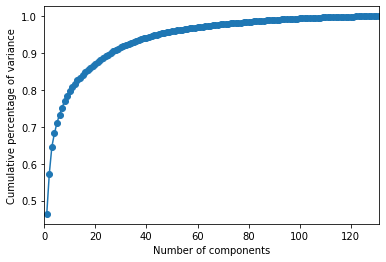

In [37]:
plt.scatter(range(1,len(X_train.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.plot(range(1,len(X_train.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 131)
plt.show()

In [40]:
np.cumsum(pca_norm.explained_variance_ratio_)[0:11]

array([0.46399429, 0.57314529, 0.646221  , 0.68219005, 0.71091465,
       0.73346195, 0.75242704, 0.77026978, 0.78359213, 0.79619557])

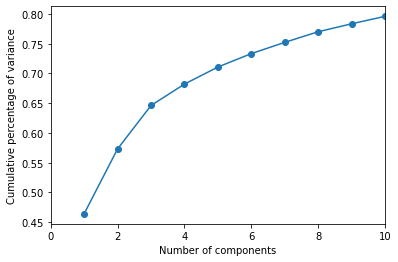

In [44]:
plt.scatter(range(1,11), np.cumsum(pca_norm.explained_variance_ratio_)[0:10])
plt.plot(range(1,11), np.cumsum(pca_norm.explained_variance_ratio_)[0:10])
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 10)
plt.show()

In [45]:
n_component = 10

pca = PCA(n_components = n_component)
scaler = StandardScaler()
scaler.fit(X_train)
X_normalized = scaler.transform(X_train)
fit_norm = pca.fit(X_normalized)
pcs = pd.DataFrame(fit_norm.components_)

In [46]:
X_new = pd.DataFrame(pca.transform(X_normalized))

In [49]:
X_all = pd.concat([X_train, X_new],axis = 1)
X_all.shape

(8113, 141)

In [50]:
corr0 = pd.DataFrame(X_all.corr().iloc[0:131,131:141].reset_index())
old_names = corr0.columns.to_list()

nums = list(range(10))
nums = [str(x) for x in nums]
new_names = ["pc" + x for x in nums]

col_dict = dict(zip(old_names, new_names))
col_dict['index'] = 'var'
corr0 = corr0.rename(columns = col_dict)

In [51]:
corr0

,var,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,9
0,worked_at_home,0.634716,0.575012,0.028992,-0.044998,-0.086641,-0.088517,0.009912,-0.150318,0.024590,-0.048580
1,white_pop,0.527764,0.526963,-0.304881,-0.427772,-0.122633,-0.128427,-0.065174,-0.096448,0.089899,-0.155502
2,white_male_45_54,0.510935,0.539575,-0.331898,-0.309407,-0.156915,-0.049356,-0.127657,-0.140333,0.088120,-0.152700
3,walked_to_work,0.393742,0.196896,0.583099,-0.099414,-0.076161,-0.200835,0.113450,0.225301,0.193640,0.196140
4,vacant_housing_units_for_sale,0.411212,-0.124626,-0.226172,-0.408901,-0.045868,0.126600,-0.005459,-0.261504,-0.077683,0.374684
5,vacant_housing_units_for_rent,0.604267,-0.060000,0.379940,-0.386170,-0.063840,0.006074,0.067936,-0.053660,-0.199303,0.076879
6,vacant_housing_units,0.267098,0.045893,0.148297,-0.472267,0.135284,0.009780,-0.042382,-0.191814,-0.057668,0.284984
7,two_parents_not_in_labor_force_families_with_y...,0.388712,-0.291242,-0.022318,-0.096862,-0.054735,-0.022941,0.074691,-0.185177,-0.005154,0.180949
8,two_parents_mother_in_labor_force_families_wit...,0.534800,-0.123127,-0.162047,-0.038897,-0.064137,0.017410,-0.047075,-0.060928,-0.041352,0.040012
9,two_parents_father_in_labor_force_families_wit...,0.795409,-0.171664,-0.201216,0.121796,-0.197995,-0.129114,-0.041608,-0.157588,-0.073360,0.090882


In [52]:
pc1_sorted = corr0.reindex(corr0.pc1.abs().sort_values(ascending = False).index)[['var','pc1']]

In [65]:
pc1_sorted.loc[abs(pc1_sorted["pc1"])>.90]

,var,pc1
11,sales_office_employed,0.948916
96,employed_retail_trade,0.946737
56,income_60000_74999,0.937931
88,female_30_to_34,0.936888
87,female_35_to_39,0.935133
57,income_50000_59999,0.930174
47,male_40_to_44,0.929487
86,female_40_to_44,0.925517
48,male_35_to_39,0.925352
89,female_25_to_29,0.918633


In [67]:
pc2_sorted = corr0.reindex(corr0.pc2.abs().sort_values(ascending = False).index)[['var','pc2']]
pc2_sorted.loc[abs(pc2_sorted["pc2"]) > .60]


,var,pc2
53,income_per_capita,0.780925
43,male_45_64_graduate_degree,0.778635
21,owner_occupied_housing_units_median_value,0.766159
20,owner_occupied_housing_units_upper_value_quartile,0.763383
124,bachelors_degree_or_higher_25_64,0.760238
22,owner_occupied_housing_units_lower_value_quartile,0.753202
45,male_45_64_bachelors_degree,0.694579
12,renter_occupied_housing_units_paying_cash_medi...,0.659121
30,million_dollar_housing_units,0.631565


In [57]:
pc3_sorted = corr0.reindex(corr0.pc3.abs().sort_values(ascending = False).index)[['var','pc3']]
pc3_sorted.loc[abs(pc3_sorted["pc3"]) > .50]

,var,pc3
27,no_cars,0.692706
28,no_car,0.680071
114,commuters_by_bus,0.632146
107,dwellings_20_to_49_units,0.620143
69,housing_built_1939_or_earlier,0.607791
3,walked_to_work,0.583099
110,dwellings_10_to_19_units,0.579549
13,rent_under_10_percent,0.570652
31,median_year_structure_built,-0.528710
18,rent_10_to_15_percent,0.519220
